In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# Checking null values, duplicates, missing value in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#there is no null values and datatype are object and integer type.

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# There is no duplicate value

In [8]:
# Lets check some statiscal value of the columns

In [31]:
#Checking unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
# The average performance of all the student is similar in all the three key features.
# The range of math score is highest and math also has minimum score.


checking unique values and their counts, so see the balance nature of the data

In [17]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [18]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [19]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [20]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [ ]:
# Defining numerical and categorical feaatures
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print('we have {} numerical features :{}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical features:{}'.format(len(categorical_feature),categorical_feature))

we have 3 numerical features :['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [35]:
# creating colimns for average score and total score

In [39]:
df['Total score']=df['math_score']+df['writing_score']+df['reading_score']
df['Average_score']=df['Total score']/3

In [40]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
#Visualization by historgram

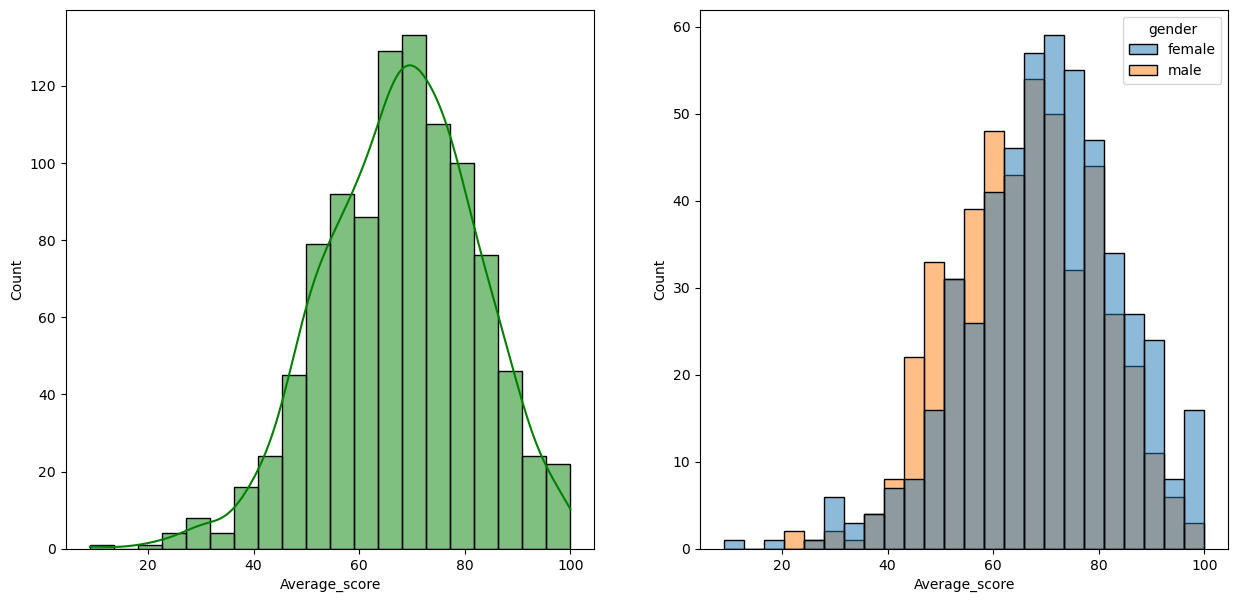

In [43]:
fig , axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score', hue='gender')
plt.show()

In [42]:
# Female on average performs better than Male counterpart

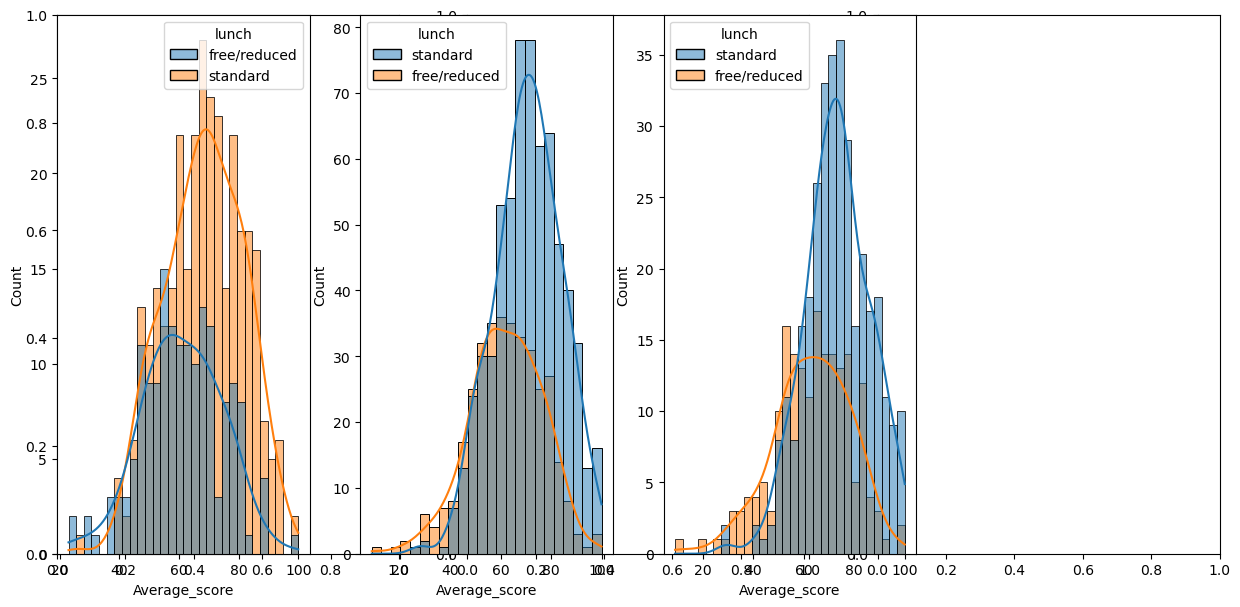

In [48]:
fig , axs= plt.subplots(1,3, figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df[df.gender=='male'],x='Average_score',bins=30,kde=True,color='g', hue='lunch')
plt.subplot(142)
sns.histplot(data=df,x='Average_score', hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average_score',bins=30,kde=True,color='g', hue='lunch')
plt.show()

In [ ]:
# There is direct correration between standard lunch and average performance of both male and female
# Female perform little bad as compared to male when provided with free/reduced food 

In [51]:
reading_full=df[df['reading_score']==100]['Average_score'].count()
writing_full=df[df['writing_score']==100]['Average_score'].count()
math_full=df[df['math_score']==100]['Average_score'].count()
print('The number of students getting full marks in reading',reading_full)
print('The number of students getting full marks in writing',writing_full)
print('The number of students getting full marks in maths',math_full)


The number of students getting full marks in reading 17
The number of students getting full marks in writing 14
The number of students getting full marks in maths 7


In [55]:
#Considering passing marks as 33%, lets us check number t students passed the exam
df.columns



Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total score', 'Average_score'],
      dtype='object')

In [54]:
reading_fail=df[df['reading_score']<=33]['Average_score'].count()
writing_fail=df[df['writing_score']<=33]['Average_score'].count()
math_fail=df[df['math_score']<=33]['Average_score'].count()
print('The number of students failed in reading',reading_fail)
print('The number of students failed in writing',writing_fail)
print('The number of students failed in maths',math_fail)

The number of students failed in reading 11
The number of students failed in writing 14
The number of students failed in maths 20


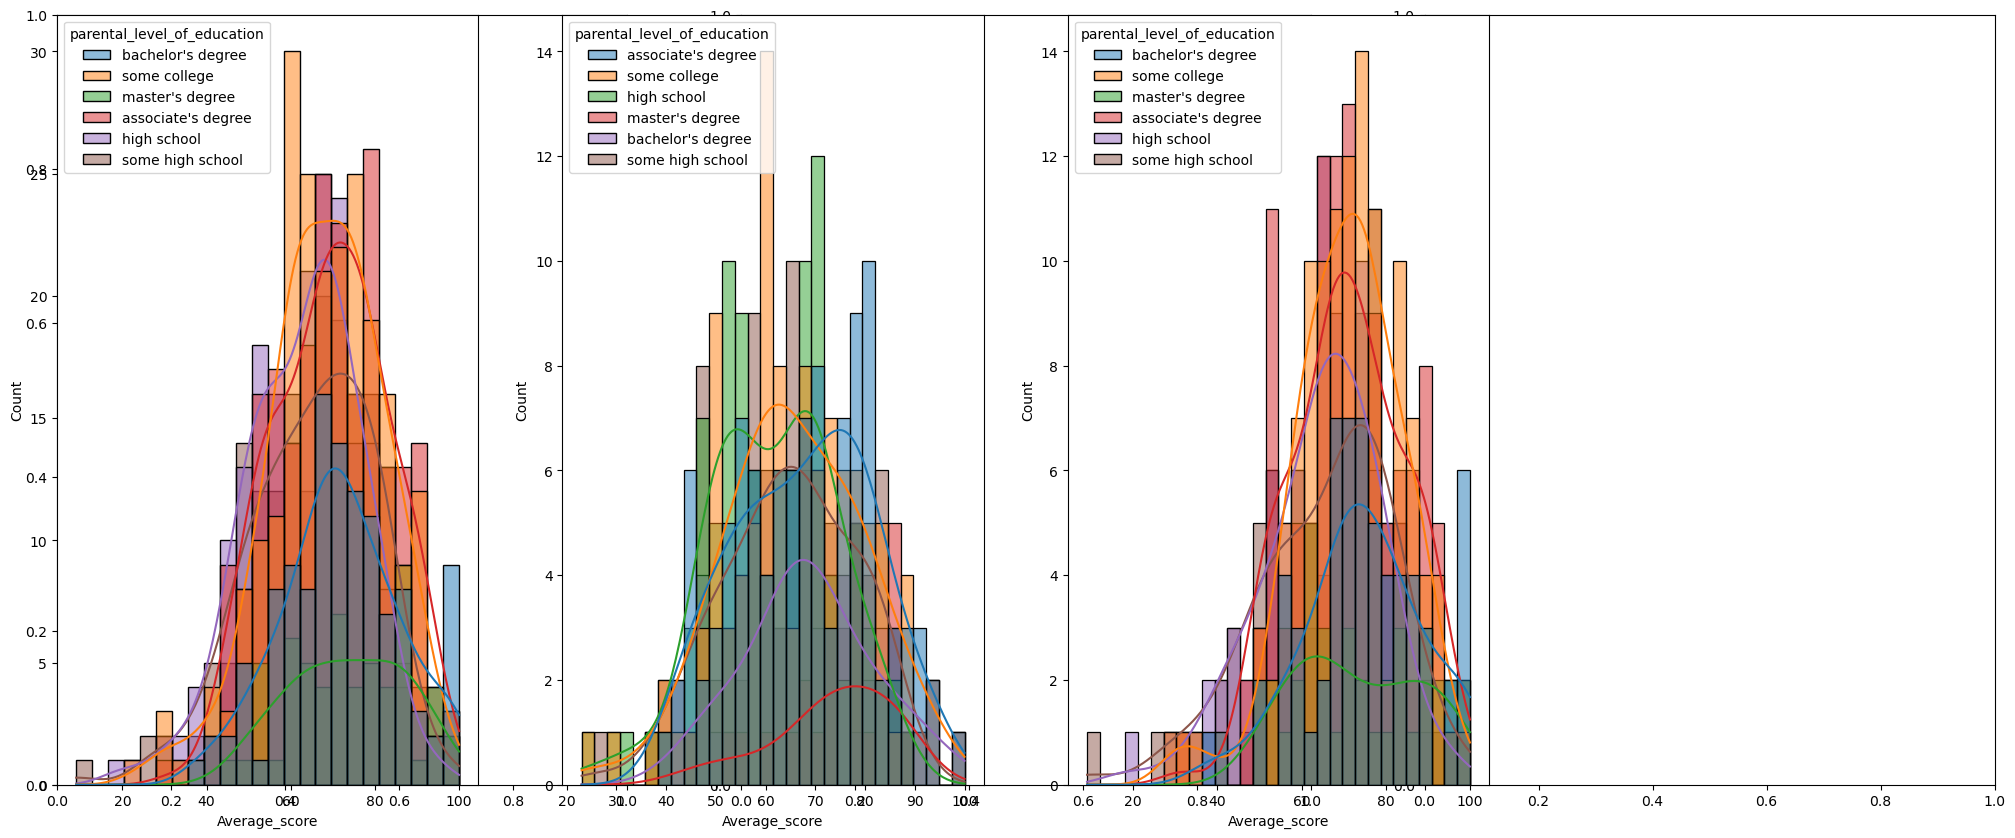

In [58]:
fig , axs= plt.subplots(1,3, figsize=(25,10))
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average_score',bins=30,kde=True,color='g', hue='parental_level_of_education')
plt.subplot(141)
sns.histplot(data=df,x='Average_score', hue='parental_level_of_education',kde=True)
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average_score',bins=30,kde=True,color='g', hue='parental_level_of_education')
plt.show()

1.This shows that there is no as such positive relation between parents education and children outcome--It contradicts the general assumption that parents education has direct relation with students performance.
2. 2nd plot shows that parents having associate degree and master degree , there is high probability that there male child perform well in the class
3. 3rd plot do not have clear evidence to show that parents education has positive impact on female child


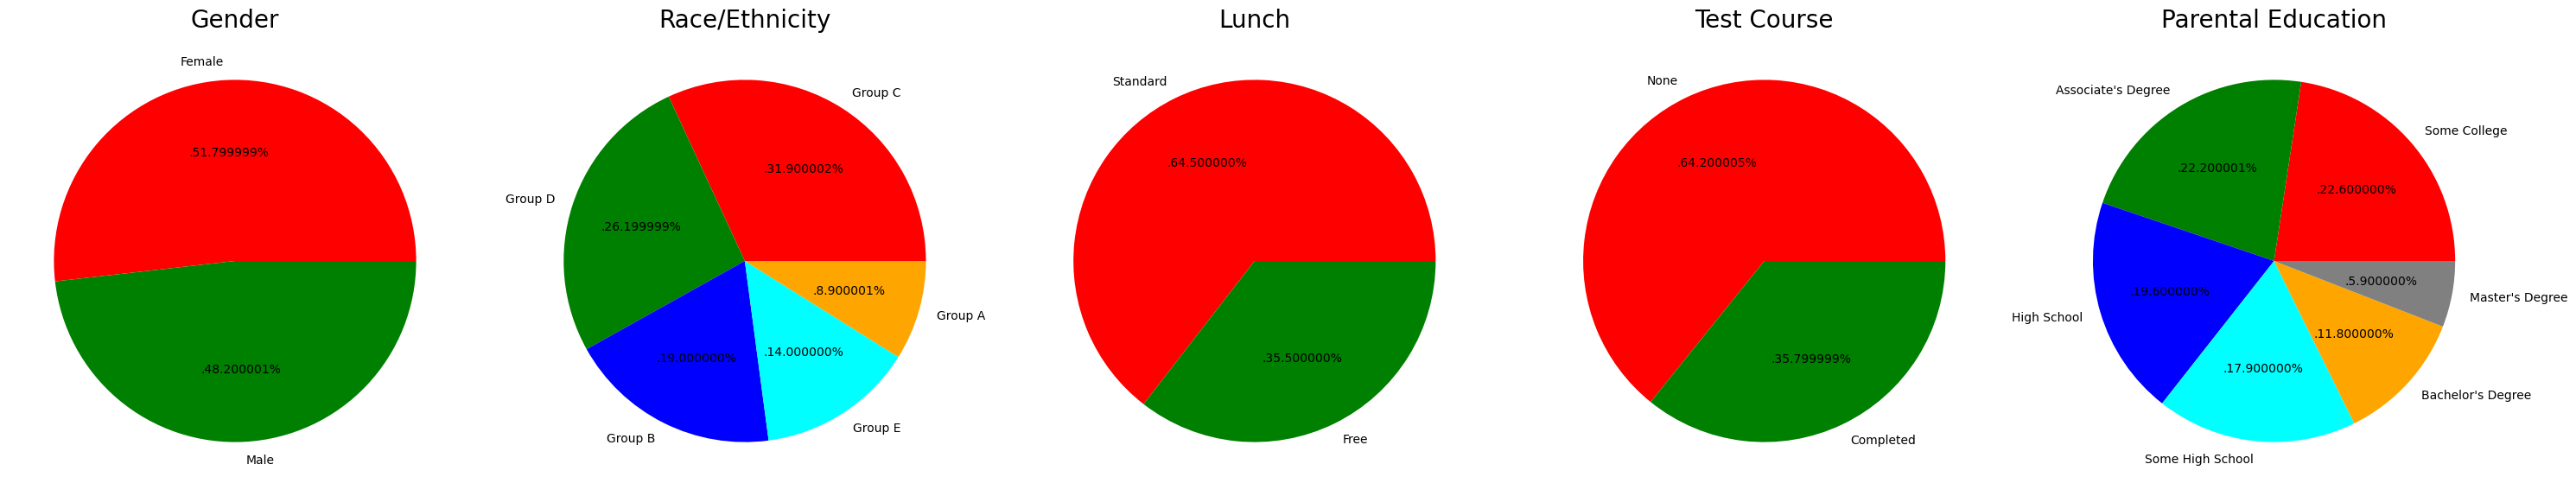

In [62]:
# 4.3 Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Number of Male and Female students is almost equal
Number students are greatest in Group C
Number of students who have standard lunch are greater
Number of students who have not enrolled in any test preparation course is greater
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

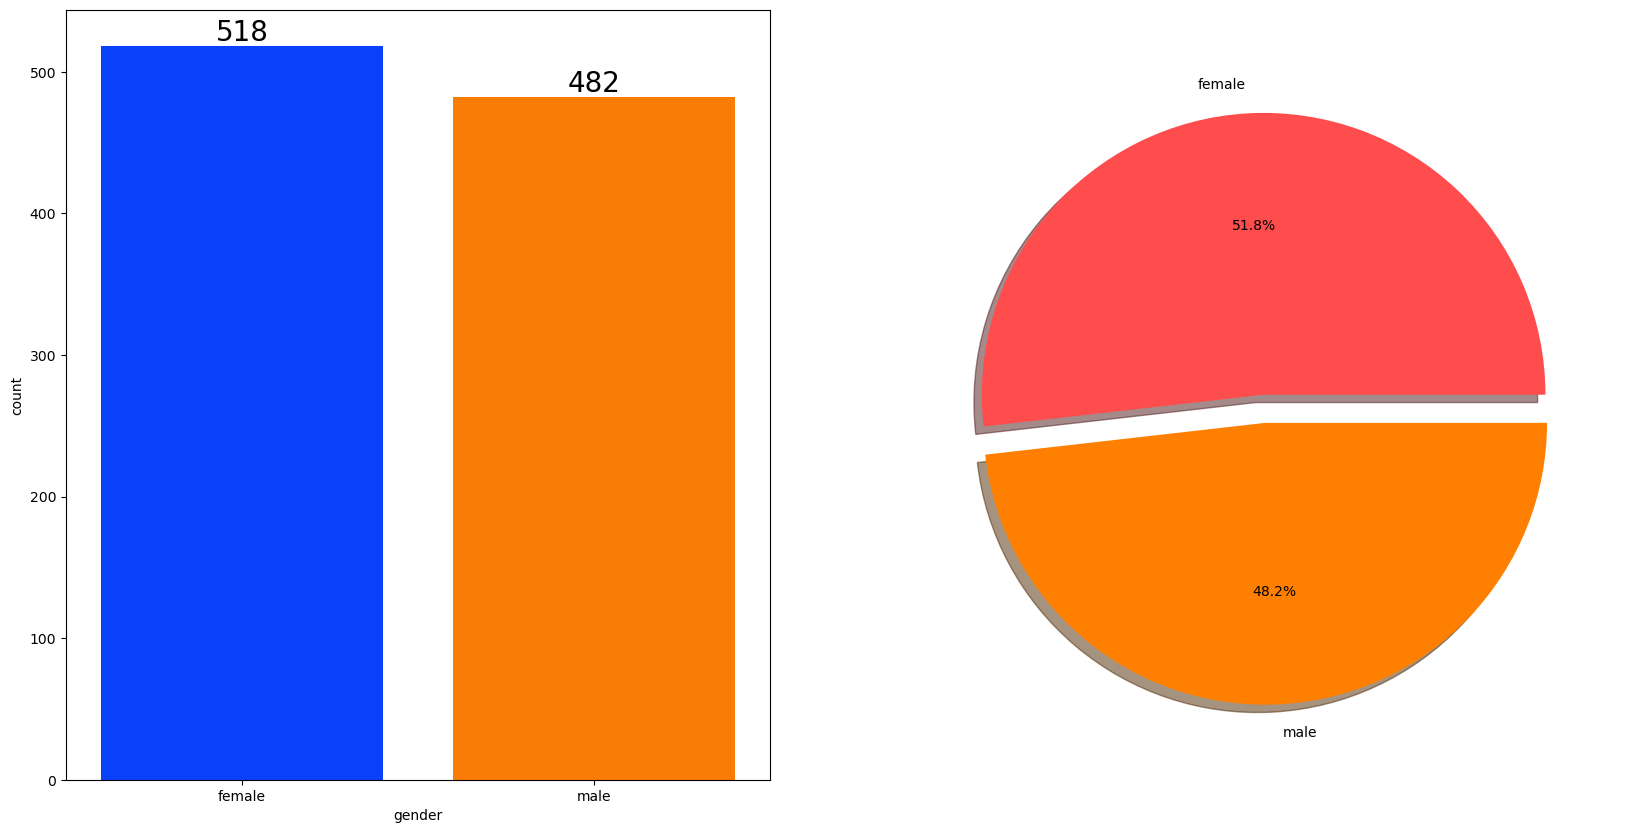

In [64]:
#Univariate Analysis
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].unique(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Equal distribution of male and female: i.e 48% : 52%


In [65]:
# Bivariate analysis---Is gender has impact on students performance

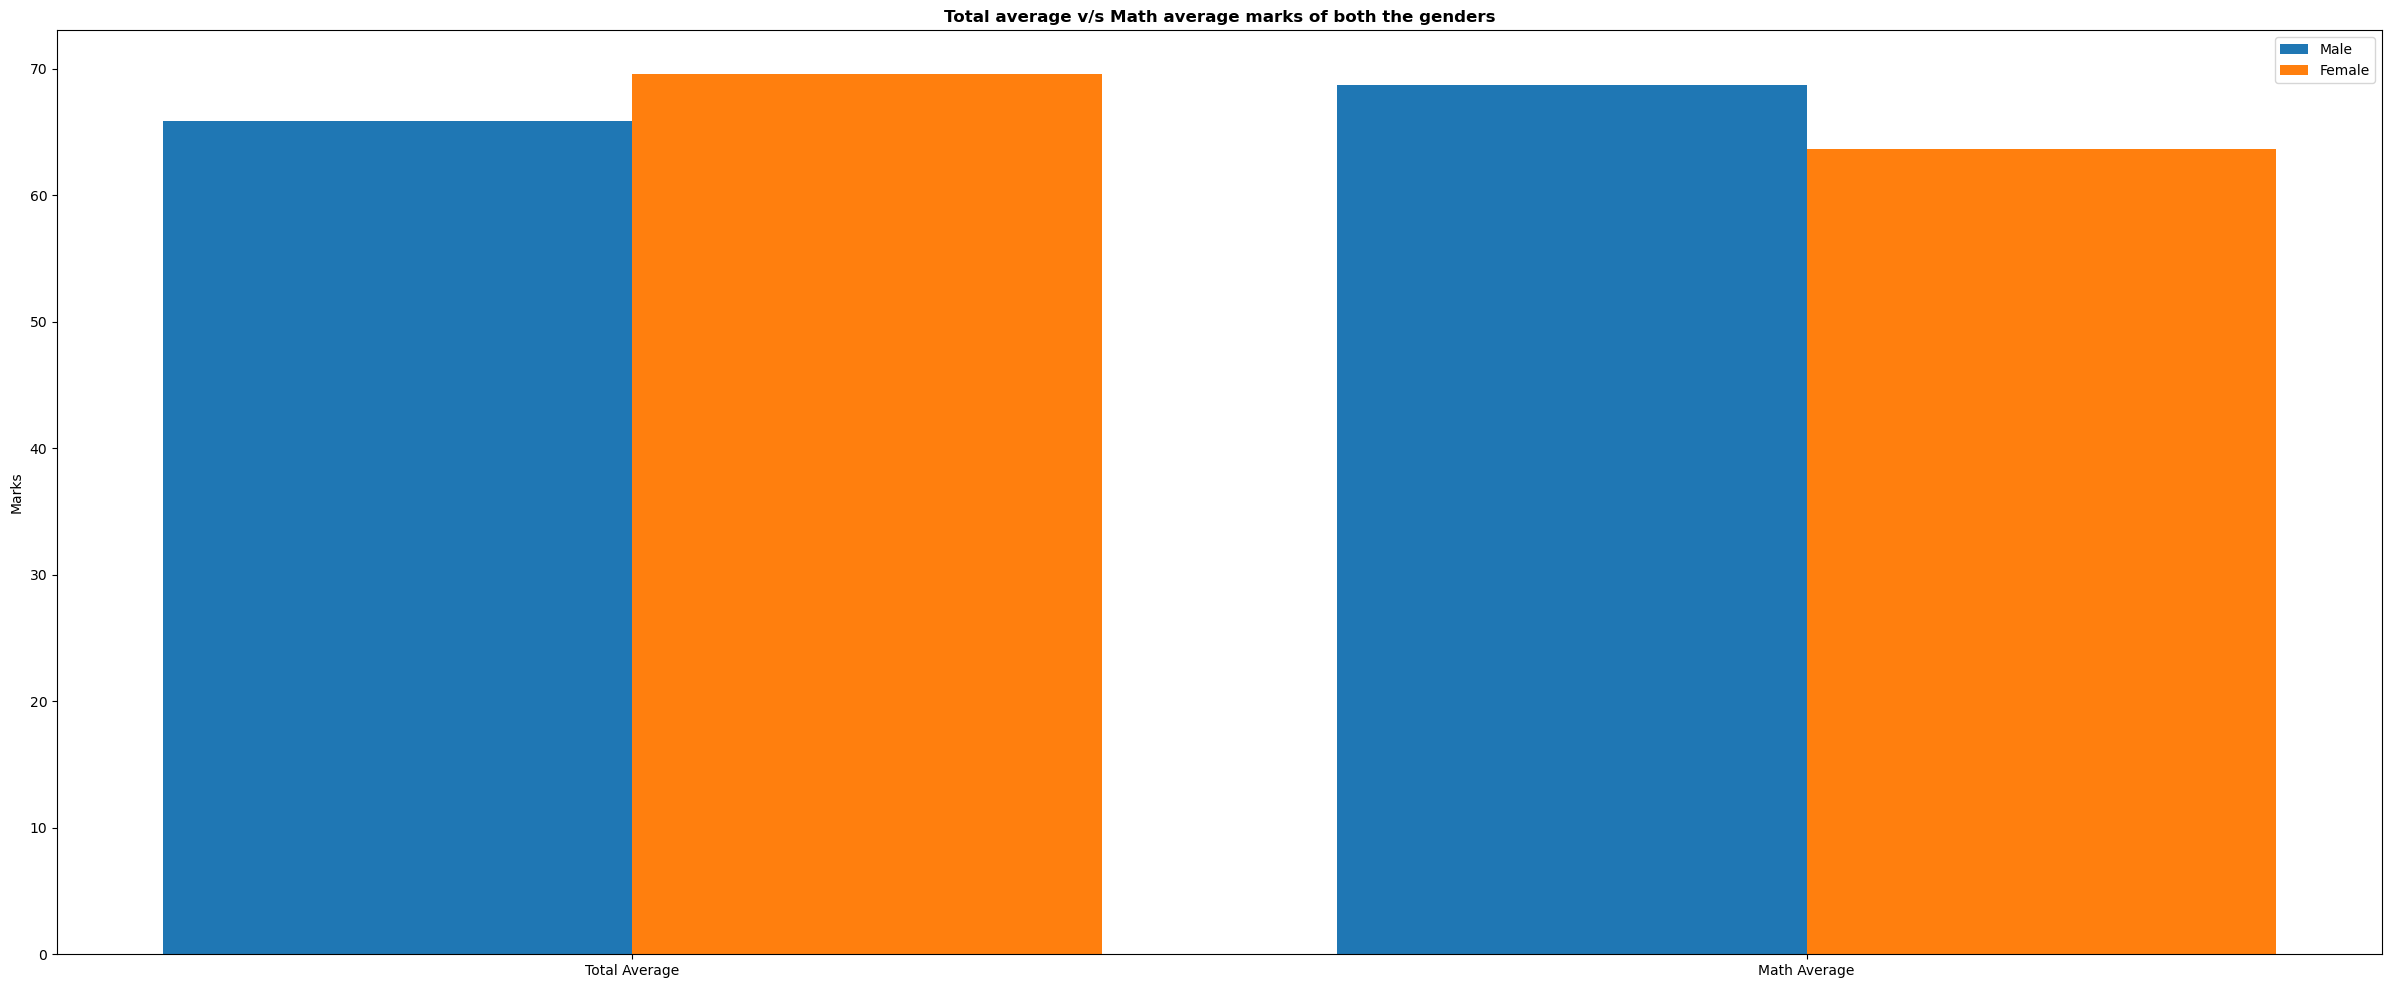

In [85]:
gender_group = df.groupby('gender').agg({'Average_score': 'mean', 'math_score': 'mean'})
female_scores = gender_group.loc['female'].values
male_scores = gender_group.loc['male'].values
X = ['Total Average','Math Average']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [87]:
# On an average females have a better overall score than men.
# whereas males have scored higher in Maths.


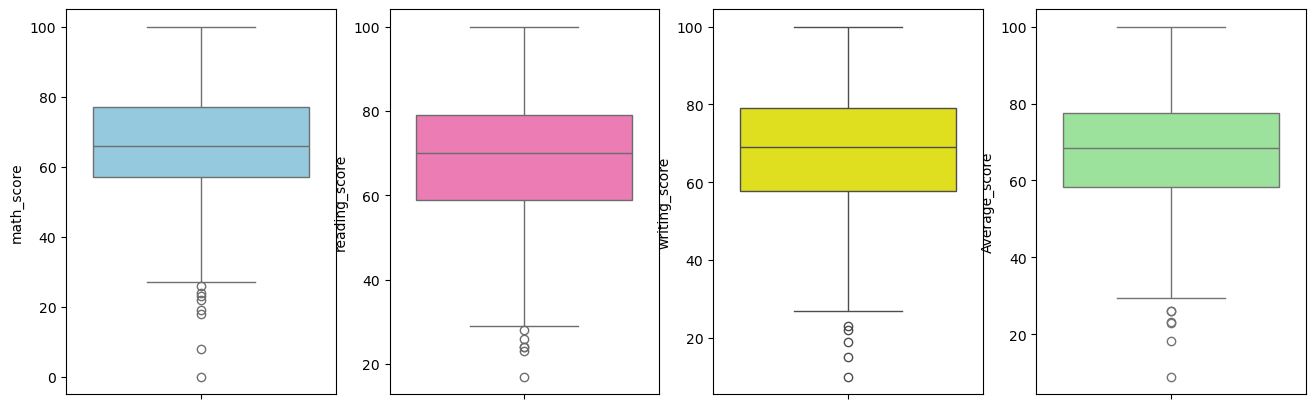

In [ ]:
#CHECKING OUTLIERS
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

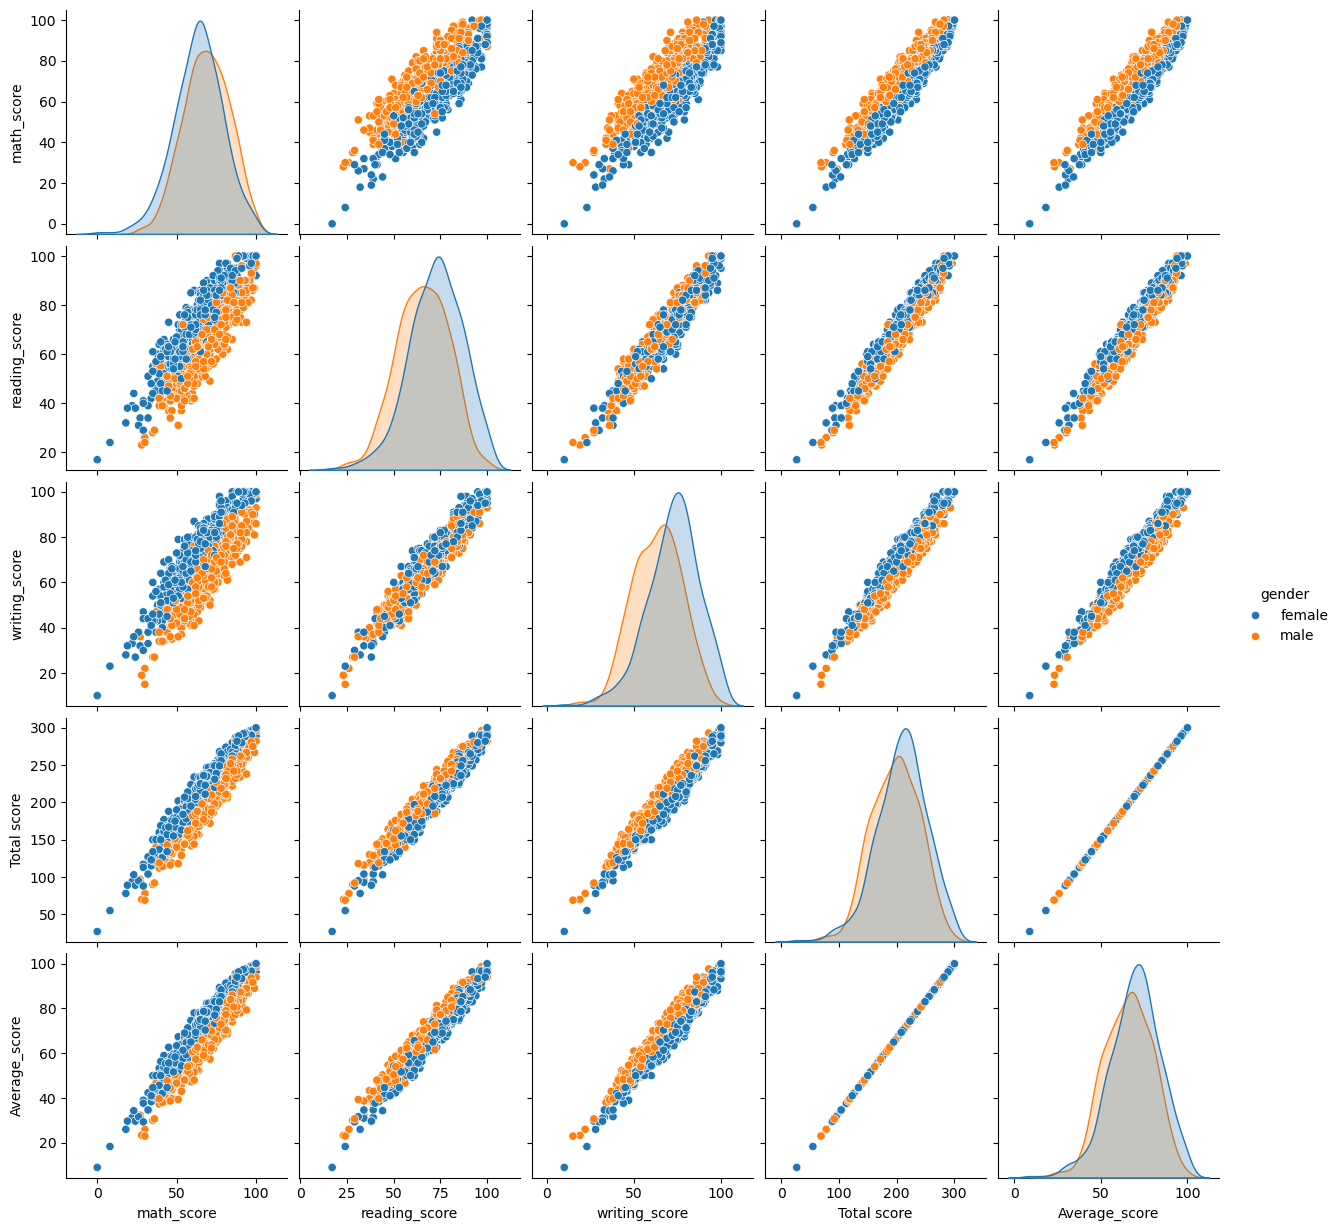

In [91]:
#MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()

In [ ]:
# there is lineear relationship between all scores.
#Conclusions
#Student's Performance is related with lunch, race, parental level education
#Females lead in pass percentage and also are top-scorers
#Student's Performance is not much related with test preparation course
#Finishing preparation course is benefitial.